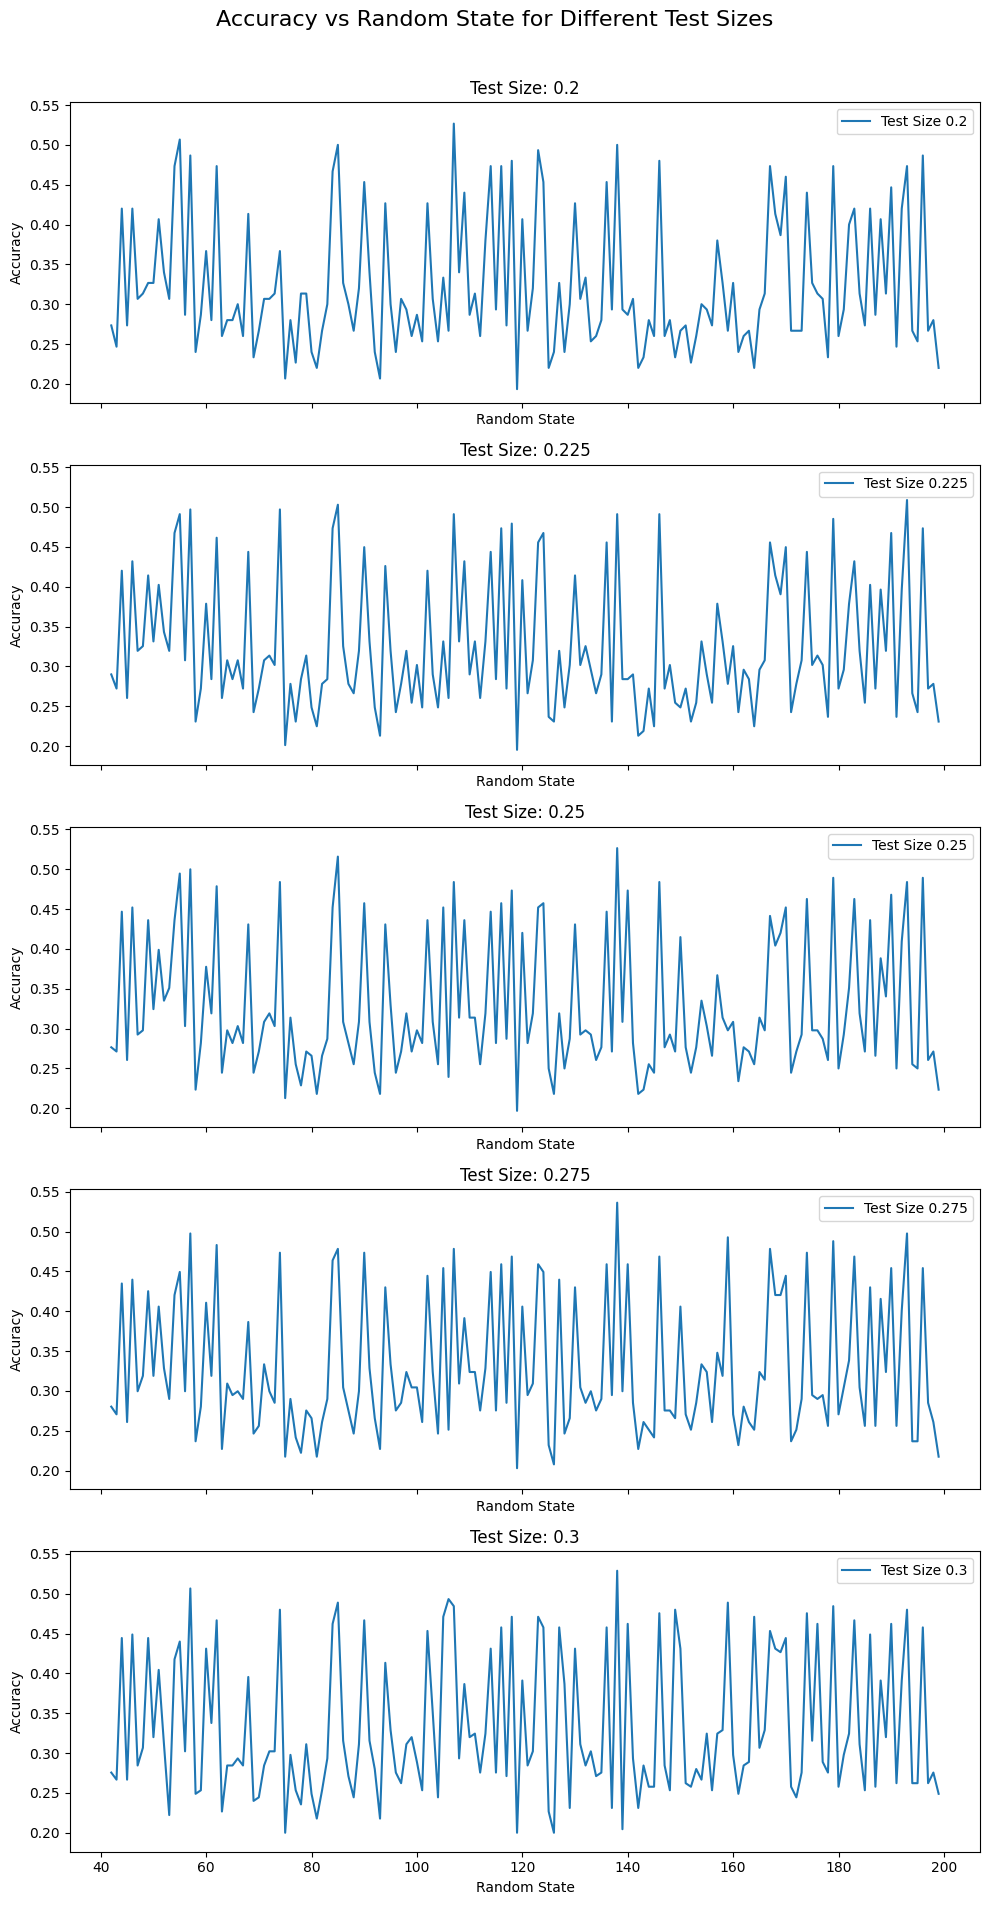

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

# Read the cleaned CSV file
df = pd.read_csv('Dataset/NoInfValues.csv')

# Assuming the last column is the target variable
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target

# Parameters
random_states = range(42, 200)
test_sizes = [0.2, 0.225, 0.25, 0.275, 0.3]

# Initialize a dictionary to hold accuracies
accuracies = {test_size: [] for test_size in test_sizes}

# Iterate over different values of random state and test set size
for random_state in random_states:
    for test_size in test_sizes:
        # Apply SMOTE to balance the classes in the entire dataset
        smote = SMOTE(random_state=random_state)
        X_smote, y_smote = smote.fit_resample(X, y)

        # Split the balanced data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=test_size, random_state=random_state)

        # Initialize Gaussian Naive Bayes classifier
        gnb = GaussianNB()

        # Train Gaussian Naive Bayes classifier
        gnb.fit(X_train, y_train)

        # Predict the labels on the testing set
        y_pred_gnb = gnb.predict(X_test)

        # Evaluate the classifier
        accuracy_gnb = accuracy_score(y_test, y_pred_gnb)

        # Store the accuracy
        accuracies[test_size].append(accuracy_gnb)

# Plot the results
fig, axes = plt.subplots(5, 1, figsize=(10, 20), sharex=True, sharey=True)
fig.suptitle('Accuracy vs Random State for Different Test Sizes', fontsize=16)

for i, test_size in enumerate(test_sizes):
    ax = axes[i]
    ax.plot(random_states, accuracies[test_size], label=f'Test Size {test_size}')
    ax.set_title(f'Test Size: {test_size}')
    ax.set_xlabel('Random State')
    ax.set_ylabel('Accuracy')
    ax.legend()

# Adjust layout to make space for all subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


In [9]:
random_state = 138
test_size = 0.275

# Apply SMOTE to balance the classes in the entire dataset
smote = SMOTE(random_state=random_state)
X_smote, y_smote = smote.fit_resample(X, y)

# Split the balanced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=test_size, random_state=random_state)

# Initialize individual Naive Bayes classifiers
gnb = GaussianNB()
mnb = MultinomialNB()

# Train Gaussian Naive Bayes classifier
gnb.fit(X_train, y_train)

# Train Multinomial Naive Bayes classifier
mnb.fit(X_train, y_train)

# Predict the labels on the testing set for both classifiers
y_pred_gnb = gnb.predict(X_test)
y_pred_mnb = mnb.predict(X_test)

# Evaluate the classifiers
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)

report_gnb = classification_report(y_test, y_pred_gnb)
report_mnb = classification_report(y_test, y_pred_mnb)

print("Gaussian Naive Bayes Classifier:")
print(f'Accuracy: {accuracy_gnb}')
print('Classification Report:')
print(report_gnb)

print("\nMultinomial Naive Bayes Classifier:")
print(f'Accuracy: {accuracy_mnb}')
print('Classification Report:')
print(report_mnb)

Gaussian Naive Bayes Classifier:
Accuracy: 0.5362318840579711
Classification Report:
              precision    recall  f1-score   support

           1       0.48      0.64      0.55        42
           2       0.71      0.92      0.80        49
           3       0.50      0.33      0.40        39
           4       0.40      0.47      0.43        45
           5       0.50      0.16      0.24        32

    accuracy                           0.54       207
   macro avg       0.52      0.50      0.49       207
weighted avg       0.53      0.54      0.51       207


Multinomial Naive Bayes Classifier:
Accuracy: 0.4106280193236715
Classification Report:
              precision    recall  f1-score   support

           1       0.41      0.76      0.53        42
           2       0.39      0.82      0.53        49
           3       0.52      0.33      0.41        39
           4       0.00      0.00      0.00        45
           5       0.00      0.00      0.00        32

    accurac

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


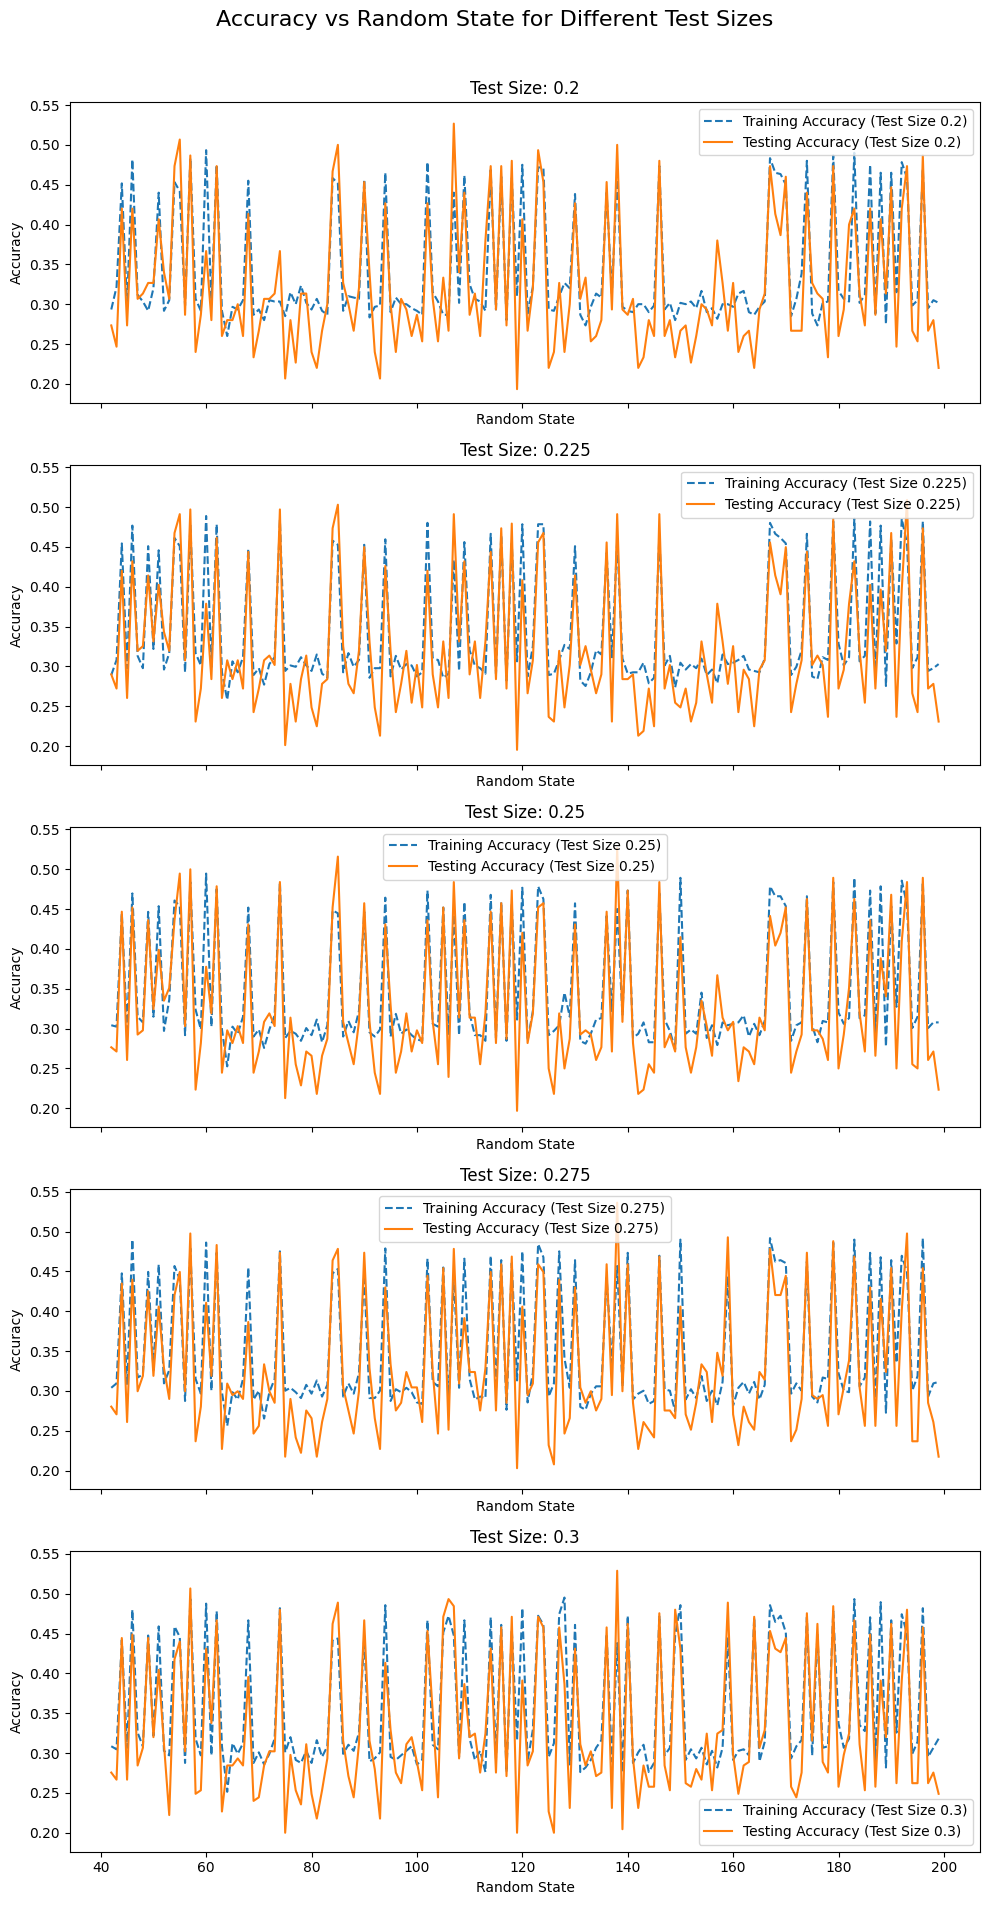

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE

# Read the cleaned CSV file
df = pd.read_csv('Dataset/NoInfValues.csv')

# Assuming the last column is the target variable
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target

# Parameters
random_states = range(42, 200)
test_sizes = [0.2, 0.225, 0.25, 0.275, 0.3]

# Initialize dictionaries to hold accuracies
train_accuracies = {test_size: [] for test_size in test_sizes}
test_accuracies = {test_size: [] for test_size in test_sizes}

# Iterate over different values of random state and test set size
for random_state in random_states:
    for test_size in test_sizes:
        # Apply SMOTE to balance the classes in the entire dataset
        smote = SMOTE(random_state=random_state)
        X_smote, y_smote = smote.fit_resample(X, y)

        # Split the balanced data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=test_size, random_state=random_state)

        # Initialize Gaussian Naive Bayes classifier
        gnb = GaussianNB()

        # Train Gaussian Naive Bayes classifier
        gnb.fit(X_train, y_train)

        # Predict the labels on the training set and testing set
        y_train_pred_gnb = gnb.predict(X_train)
        y_test_pred_gnb = gnb.predict(X_test)

        # Evaluate the classifier
        train_accuracy_gnb = accuracy_score(y_train, y_train_pred_gnb)
        test_accuracy_gnb = accuracy_score(y_test, y_test_pred_gnb)

        # Store the accuracies
        train_accuracies[test_size].append(train_accuracy_gnb)
        test_accuracies[test_size].append(test_accuracy_gnb)

# Plot the results
fig, axes = plt.subplots(5, 1, figsize=(10, 20), sharex=True, sharey=True)
fig.suptitle('Accuracy vs Random State for Different Test Sizes', fontsize=16)

for i, test_size in enumerate(test_sizes):
    ax = axes[i]
    ax.plot(random_states, train_accuracies[test_size], label=f'Training Accuracy (Test Size {test_size})', linestyle='--')
    ax.plot(random_states, test_accuracies[test_size], label=f'Testing Accuracy (Test Size {test_size})')
    ax.set_title(f'Test Size: {test_size}')
    ax.set_xlabel('Random State')
    ax.set_ylabel('Accuracy')
    ax.legend()

# Adjust layout to make space for all subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


In [18]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load datasets
stat_df = pd.read_csv('Dataset/statistical_features_by_subject.csv')
raw_df = pd.read_csv('Dataset/dataset.csv')

# Select only the 'X' related columns and the 'ClassLabel' from the statistical dataset
features = stat_df[['mean_X', 'std_dev_X', 'energy_X', 'ClassLabel']]

# Prepare features and labels for training
X_train = features[['mean_X', 'std_dev_X', 'energy_X']]
y_train = features['ClassLabel']

# Train a classification model (Random Forest in this case)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Function to calculate energy
def calculate_energy(series):
    return np.sum(series ** 2)

# Function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from the 'X' column in the raw dataset
cleaned_raw_df = remove_outliers(raw_df, 'X')

# Group the cleaned raw data by 'ClassLabel' and calculate statistics for 'X'
raw_features = cleaned_raw_df.groupby('ClassLabel')['X'].agg(
    mean_X=np.mean,
    std_dev_X=np.std,
    energy_X=calculate_energy
).reset_index()

# Prepare the test data from raw dataset
X_raw_test = raw_features[['mean_X', 'std_dev_X', 'energy_X']]
y_raw_test = raw_features['ClassLabel']

# Predict the class labels for the test data
y_raw_pred = model.predict(X_raw_test)

# Evaluate the model on the raw test data
print(f"Accuracy on raw dataset: {accuracy_score(y_raw_test, y_raw_pred)}")
print("Classification Report on raw dataset:")
print(classification_report(y_raw_test, y_raw_pred))


Accuracy on raw dataset: 0.8
Classification Report on raw dataset:
              precision    recall  f1-score   support

           1       0.50      1.00      0.67         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.70      0.80      0.73         5
weighted avg       0.70      0.80      0.73         5



C:\Users\USER\AppData\Local\Temp\ipykernel_22956\1456045334.py:38: FutureWarning: The provided callable <function mean at 0x000002350FAE3BA0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  raw_features = cleaned_raw_df.groupby('ClassLabel')['X'].agg(
C:\Users\USER\AppData\Local\Temp\ipykernel_22956\1456045334.py:38: FutureWarning: The provided callable <function std at 0x000002350FAE3D80> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  raw_features = cleaned_raw_df.groupby('ClassLabel')['X'].agg(
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [33]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load datasets
stat_df = pd.read_csv('Dataset/statistical_features_by_subject.csv')
raw_df = pd.read_csv('Dataset/dataset.csv')

# Select 'X', 'Y', and 'ClassLabel' from the statistical dataset
features = stat_df[['mean_X', 'std_dev_X', 'energy_X', 'mean_Y', 'std_dev_Y', 'energy_Y', 'ClassLabel']]

# Prepare features and labels for training
X_train = features[['mean_X', 'std_dev_X', 'energy_X', 'mean_Y', 'std_dev_Y', 'energy_Y']]
y_train = features['ClassLabel']

# Train the Gaussian Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Prepare test data from raw dataset
raw_features = raw_df.groupby('ClassLabel').agg(
    mean_X=('X', np.mean),
    std_dev_X=('X', np.std),
    energy_X=('X', lambda x: np.sum(x ** 2)),
    mean_Y=('Y', np.mean),
    std_dev_Y=('Y', np.std),
    energy_Y=('Y', lambda x: np.sum(x ** 2))
).reset_index()

# Predict the class labels for the test data
X_raw_test = raw_features[['mean_X', 'std_dev_X', 'energy_X', 'mean_Y', 'std_dev_Y', 'energy_Y']]
y_raw_test = raw_features['ClassLabel']
y_raw_pred = nb.predict(X_raw_test)

# Evaluate the model on the raw test data
print(f"Accuracy on raw dataset: {accuracy_score(y_raw_test, y_raw_pred)}")
print("Classification Report on raw dataset:")
print(classification_report(y_raw_test, y_raw_pred))


Accuracy on raw dataset: 0.2
Classification Report on raw dataset:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.25      1.00      0.40         1

    accuracy                           0.20         5
   macro avg       0.05      0.20      0.08         5
weighted avg       0.05      0.20      0.08         5



C:\Users\USER\AppData\Local\Temp\ipykernel_22956\2903726369.py:22: FutureWarning: The provided callable <function mean at 0x000002350FAE3BA0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  raw_features = raw_df.groupby('ClassLabel').agg(
C:\Users\USER\AppData\Local\Temp\ipykernel_22956\2903726369.py:22: FutureWarning: The provided callable <function std at 0x000002350FAE3D80> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  raw_features = raw_df.groupby('ClassLabel').agg(
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

In [34]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Load datasets
stat_df = pd.read_csv('Dataset/statistical_features_by_subject.csv')
raw_df = pd.read_csv('Dataset/dataset.csv')

# Select 'X', 'Y', and 'ClassLabel' from the statistical dataset
features = stat_df[['mean_X', 'std_dev_X', 'energy_X', 'mean_Y', 'std_dev_Y', 'energy_Y', 'ClassLabel']]

# Prepare features and labels for training
X_train = features[['mean_X', 'std_dev_X', 'energy_X', 'mean_Y', 'std_dev_Y', 'energy_Y']]
y_train = features['ClassLabel']

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the Gaussian Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train_resampled, y_train_resampled)

# Prepare test data from raw dataset
raw_features = raw_df.groupby('ClassLabel').agg(
    mean_X=('X', np.mean),
    std_dev_X=('X', np.std),
    energy_X=('X', lambda x: np.sum(x ** 2)),
    mean_Y=('Y', np.mean),
    std_dev_Y=('Y', np.std),
    energy_Y=('Y', lambda x: np.sum(x ** 2))
).reset_index()

# Predict the class labels for the test data
X_raw_test = raw_features[['mean_X', 'std_dev_X', 'energy_X', 'mean_Y', 'std_dev_Y', 'energy_Y']]
y_raw_test = raw_features['ClassLabel']
y_raw_pred = nb.predict(X_raw_test)

# Evaluate the model on the raw test data
print(f"Accuracy on raw dataset: {accuracy_score(y_raw_test, y_raw_pred)}")
print("Classification Report on raw dataset:")
print(classification_report(y_raw_test, y_raw_pred))


Accuracy on raw dataset: 0.2
Classification Report on raw dataset:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.25      1.00      0.40         1

    accuracy                           0.20         5
   macro avg       0.05      0.20      0.08         5
weighted avg       0.05      0.20      0.08         5



C:\Users\USER\AppData\Local\Temp\ipykernel_22956\1269470727.py:27: FutureWarning: The provided callable <function mean at 0x000002350FAE3BA0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  raw_features = raw_df.groupby('ClassLabel').agg(
C:\Users\USER\AppData\Local\Temp\ipykernel_22956\1269470727.py:27: FutureWarning: The provided callable <function std at 0x000002350FAE3D80> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  raw_features = raw_df.groupby('ClassLabel').agg(
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

In [36]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Load raw dataset
raw_df = pd.read_csv('Dataset/dataset.csv')

# Function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from the 'X' column
cleaned_df = remove_outliers(raw_df, 'X')

# Split the dataset into training and testing sets
X_train, X_test = train_test_split(cleaned_df, test_size=0.2, random_state=42)

# Group the training data by 'ClassLabel' and calculate statistics for 'X'
train_features = X_train.groupby('ClassLabel')['X'].agg(
    mean_X=np.mean,
    std_dev_X=np.std,
    energy_X=lambda x: np.sum(x ** 2)
).reset_index()

# Prepare features and labels for training
X_train_features = train_features[['mean_X', 'std_dev_X', 'energy_X']]
y_train = train_features['ClassLabel']
print("X_train:")
print(X_train)

print("\ny_train:")
print(y_train)


# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_features, y_train)

# Train the Gaussian Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train_resampled, y_train_resampled)

# Prepare test data from the testing set
test_features = X_test.groupby('ClassLabel')['X'].agg(
    mean_X=np.mean,
    std_dev_X=np.std,
    energy_X=lambda x: np.sum(x ** 2)
).reset_index()

X_test_features = test_features[['mean_X', 'std_dev_X', 'energy_X']]
y_test = test_features['ClassLabel']

# Predict the class labels for the test data
y_pred = nb.predict(X_test_features)

# Evaluate the model on the test data
print("Accuracy on test dataset:", accuracy_score(y_test, y_pred))
print("Classification Report on test dataset:")
print(classification_report(y_test, y_pred))


X_train:
             X         Y         Z     Mixed  ClassLabel
1264 -0.006762 -0.066330  0.019073  0.069348           2
3185 -0.038943  0.187668 -0.018620  0.192568           4
2695 -0.110119 -0.275558  0.108490  0.315957           3
4016  0.082294  0.276245  0.078289  0.298685           4
4444  0.237581 -0.171249 -0.007971  0.292976           5
...        ...       ...       ...       ...         ...
4849  0.106236 -0.233978 -0.092503  0.273109           5
517   0.257566  0.150482 -0.162857  0.339864           1
3401 -0.149820 -0.063980 -0.064217  0.175110           4
4109 -0.052979 -0.122864  0.014530  0.134586           5
963  -0.081791 -0.352745  0.122730  0.382337           1

[3667 rows x 5 columns]

y_train:
0    1
1    2
2    3
3    4
4    5
Name: ClassLabel, dtype: int64
Accuracy on test dataset: 0.2
Classification Report on test dataset:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.20     

C:\Users\USER\AppData\Local\Temp\ipykernel_22956\54520589.py:28: FutureWarning: The provided callable <function mean at 0x000002350FAE3BA0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  train_features = X_train.groupby('ClassLabel')['X'].agg(
C:\Users\USER\AppData\Local\Temp\ipykernel_22956\54520589.py:28: FutureWarning: The provided callable <function std at 0x000002350FAE3D80> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  train_features = X_train.groupby('ClassLabel')['X'].agg(
C:\Users\USER\AppData\Local\Temp\ipykernel_22956\54520589.py:53: FutureWarning: The provided callable <function mean at 0x000002350FAE3BA0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To kee

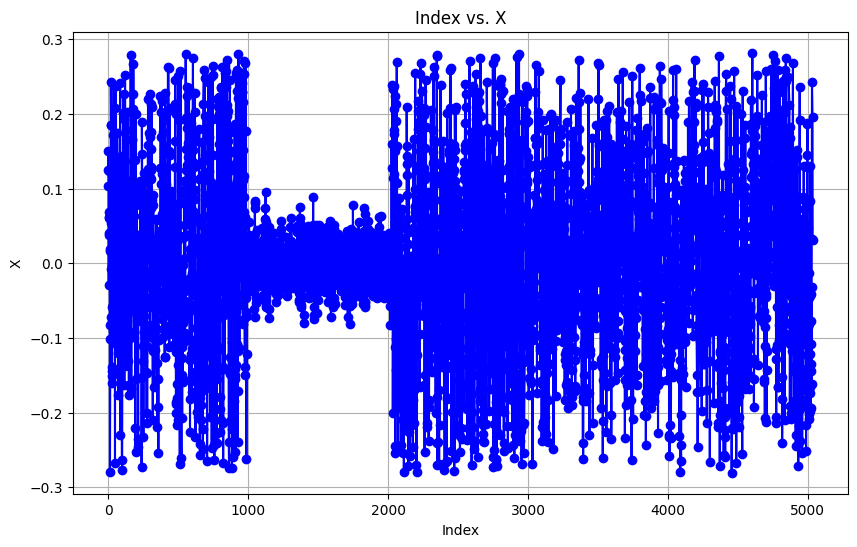

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Dataset/dataset.csv')

# Function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from the 'X' column
cleaned_df = remove_outliers(df, 'X')

# Plot the graph for index and X
plt.figure(figsize=(10, 6))
plt.plot(cleaned_df.index, cleaned_df['X'], color='blue', marker='o', linestyle='-')
plt.title('Index vs. X')
plt.xlabel('Index')
plt.ylabel('X')
plt.grid(True)
plt.show()
